In [2]:
import numpy as np

In [57]:
A = np.zeros((4,3,2))

In [58]:
A

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [59]:
A[3][0][1] += 1

In [60]:
A

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 1.],
        [0., 0.],
        [0., 0.]]])

In [9]:
import cv2
import matplotlib.pyplot as plt

In [10]:
img = cv2.imread('lenna.jpg',0) #直接读为灰度图像

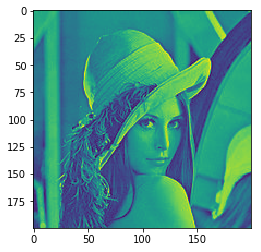

In [16]:
plt.imshow(img)

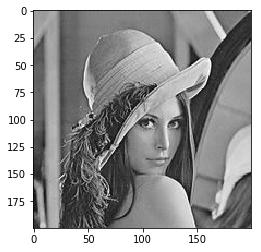

In [12]:
plt.imshow(img,'gray')

In [13]:
img1 = cv2.imread('lenna.jpg',1) #直接读为彩色图像

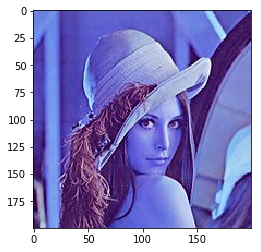

In [14]:
plt.imshow(img1,'gray')

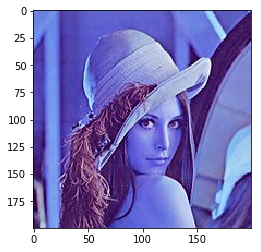

In [15]:
plt.imshow(img1)

In [19]:
ret,thresh1=cv2.threshold(img,50,1,cv2.THRESH_BINARY_INV) 

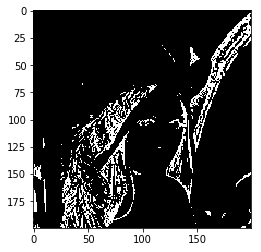

In [20]:
plt.imshow(thresh1,'gray')

In [22]:
ret,thresh2 = cv2.threshold(img,50,1,cv2.THRESH_BINARY) 

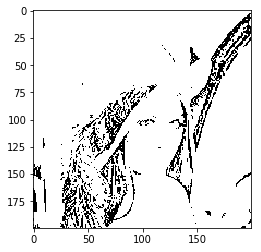

In [23]:
plt.imshow(thresh2,'gray')

In [24]:
print(ret) #ret为阈值的值

50.0


In [25]:
ret,thresh3 = cv2.threshold(img,50,1,cv2.THRESH_TRUNC) 
ret,thresh4 = cv2.threshold(img,50,1,cv2.THRESH_TOZERO) 
ret,thresh5 = cv2.threshold(img,50,1,cv2.THRESH_TOZERO_INV)

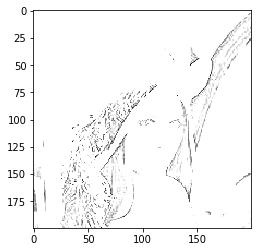

In [26]:
plt.imshow(thresh3,'gray')

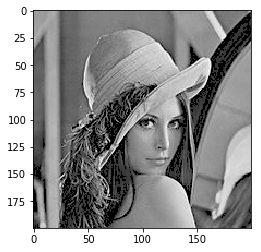

In [27]:
plt.imshow(thresh4,'gray')

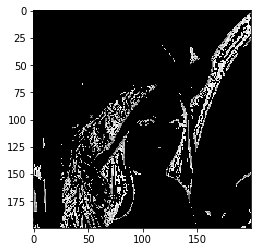

In [28]:
plt.imshow(thresh5,'gray')

In [36]:
# 二值化
def binaryzation(img):
    cv_img = img.astype(np.uint8)   #修改数据类型为uint8：Unsigned integer (0 to 255)
    ret,cv_img = cv2.threshold(cv_img,50,1,cv2.THRESH_BINARY_INV)#图像中的灰度值大于50的重置像素值为0，否则为1
    return cv_img

<div align=center>![pic](cvthreshold.png)

In [33]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [34]:
raw_data = pd.read_csv('../data/train.csv',header=0)
data = raw_data.values

imgs = data[0::,1::]
labels = data[::,0]

# 选取 2/3 数据作为训练集， 1/3 数据作为测试集
train_features, test_features, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.33, random_state=23323)

In [38]:
train_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
train_features.shape

(28140, 784)

In [84]:
imgA = binaryzation(train_features)

In [85]:
imgA.shape

(28140, 784)

In [86]:
prior_probability = np.zeros(10)                         # 先验概率： 由于先验概率分母都是N，因此不用除于N，直接用分子即可。   因为对求极值没有影响
conditional_probability = np.zeros((10,784,2))   # 条件概率 这里class=10，feature_len = 784 ，2代表特征只有2个取值分别为0/1

In [87]:
imgA = binaryzation(train_features[0])     # 图片二值化
label = train_labels[0]
prior_probability[label] += 1

In [88]:
imgA

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [89]:
label

9

In [90]:
prior_probability

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [91]:
imgA[0]

array([1], dtype=uint8)

In [93]:
for j in range(784):
    conditional_probability[label][j][imgA[j]] += 1

In [95]:
conditional_probability[9]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [96]:
len(imgA)

784

In [97]:
b = [1,2,3,4,5]

In [98]:
a = [2,3,4,5,6]

In [100]:
np.array(b)

array([1, 2, 3, 4, 5])

In [101]:
b

[1, 2, 3, 4, 5]